In [1]:
import sys,os
os.environ['pRT_input_data_path'] = '/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/'
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from spectres import spectres
from astropy.io import fits
from petitRADTRANS.retrieval import plot_style as ps
from petitRADTRANS.retrieval.parameter import Parameter
from petitRADTRANS.retrieval import RetrievalConfig, Retrieval, plot_style
from petitRADTRANS.retrieval.util import gaussian_prior, inverse_gamma_prior
from petitRADTRANS.retrieval.models import emission_model_diseq, guillot_emission, interpolated_profile_emission
from petitRADTRANS import nat_cst as nc
import copy as cp

Initiating species v0.5.5... [DONE]
Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Grid interpolation method: linear
Using pRT Plotting style!


In [2]:
obs_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/"
data_dir="/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/b_free/"

retrievals = ["HR8799b_23_v01_free_all_correctos_clear_0nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_1nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_2nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_3nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_4nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_5nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_6nodes_v2",
              "HR8799b_23_v01_free_all_correctos_clear_7nodes_v2"]

retrievals = ["HR8799b_23_v01_free_all_correctos_freeMgCloud_2nodes_v4"]

retrievals =['HR8799e_23_v01_free_gravphot_freeMgCloud_guillot_mrsigmaprior',
            'HR8799e_23_v01_free_all_freeFeMgCloud_guillotpatchy_newphot_newconv', 
            'HR8799e_23_v03_free_onlygrav_clear_guillot', 
            'HR8799e_23_v01_free_all_freeFeMgCloud_guillot', 
            'HR8799e_23_v03_free_onlygravphot_freeFeCloud_guillot',
            'HR8799e_23_v01_free_all_freeMgCloud_guillot',
            'HR8799e_23_v01_free_all_freeFeMgCloud_guillotfseds_newphot_newconv', 
            'HR8799e_23_v03_free_onlygravphot_freeMgCloud_guillot_mrprior', 
            'HR8799e_23_v03_free_onlygrav_freeMgCloud_guillot', 
            'HR8799e_23_v01_free_all_clear_guillot',
            'HR8799e_23_v03_free_onlygravphot_clear_guillot', 
            'HR8799e_23_v03_free_onlygravphot_freeMgCloud_guillot', 
            'HR8799e_23_v01_free_all_freeMg2Cloud_guillot_newphot_newconv']
#retrievals = ["HR8799e_23_v01_diseq_all_eqFeMgCloud"]
#ret_num = 0

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/radtrans.py:103: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  FutureWarning)


Starting retrieval HR8799b_23_v01_free_all_correctos_freeMgCloud_2nodes_v4Setting up PRT Objects
Emission scattering is enabled: enforcing test_ck_shuffle_comp = True
  Read line opacities of H2O_Exomol...
 Done.
  Read line opacities of CH4...
 Done.
  Read line opacities of CO2...
 Done.
  Read line opacities of HCN...
 Done.
  Read line opacities of H2S...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.

Setting up AMR pressure grid.
Emission scattering is enabled: enforcing test_ck_shuffle_comp = True
  Read line opacities of H2O_Exomol_R_300...
 Done.
  Read line opacities of CO_all_iso_HITEMP_R_300...
 Done.
  Read line opacities of CH4_R_300...
 Done.
  Read line opacities of CO2_R_300...
 Done.
  Read line opacities of HCN_R_300...
 Done.
  Read line opacities of H2S_R_300...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.

Setting up AMR pressure grid.
Emission scattering is enabled: enforcing test_ck_shuffle_

/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/radtrans.py:103: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  FutureWarning)


  Read line opacities of H2O_Exomol...
 Done.
  Read line opacities of CH4...
 Done.
  Read line opacities of CO2...
 Done.
  Read line opacities of HCN...
 Done.
  Read line opacities of H2S...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.

Setting up AMR pressure grid.


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/retrieval/retrieval.py:1361: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  'mean',dd.wlen.shape[0]/ratio)/np.sqrt(ratio)
/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/retrieval/retrieval.py:1557: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.s

𝛘^2/DoF = 4149.84


/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/retrieval/retrieval.py:1557: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f"{self.output_dir}evaluate_{self.rd.retrieval_name}/{self.retrieval_name}_{mode}_spec.pdf", bbox_inches = 'tight')



Plotting PT profiles
Best fit likelihood = 10038.39


/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/radtrans.py:103: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  FutureWarning)


Emission scattering is enabled: enforcing test_ck_shuffle_comp = True
  Read line opacities of H2O_Exomol...
 Done.
  Read line opacities of CH4...
 Done.
  Read line opacities of CO2...
 Done.
  Read line opacities of HCN...
 Done.
  Read line opacities of H2S...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.


Making corner plot
HR8799b_23_v01_free_all_correctos_freeMgCloud_2nodes_v4

Plotting Best-fit contribution function
Best fit likelihood = 10038.39
Loading best fit spectrum and contribution from file

Plotting Abundances profiles
Best fit likelihood = 10038.39
Loading best fit spectrum and contribution from file
Done!


IndexError: list index out of range

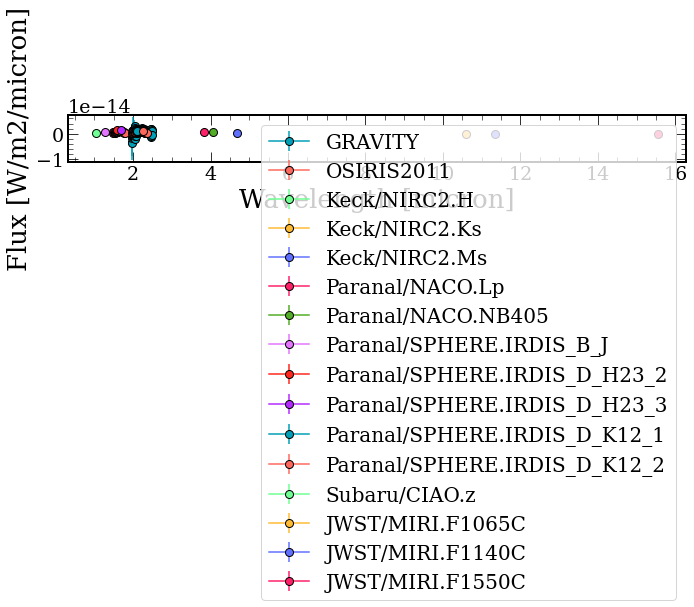

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


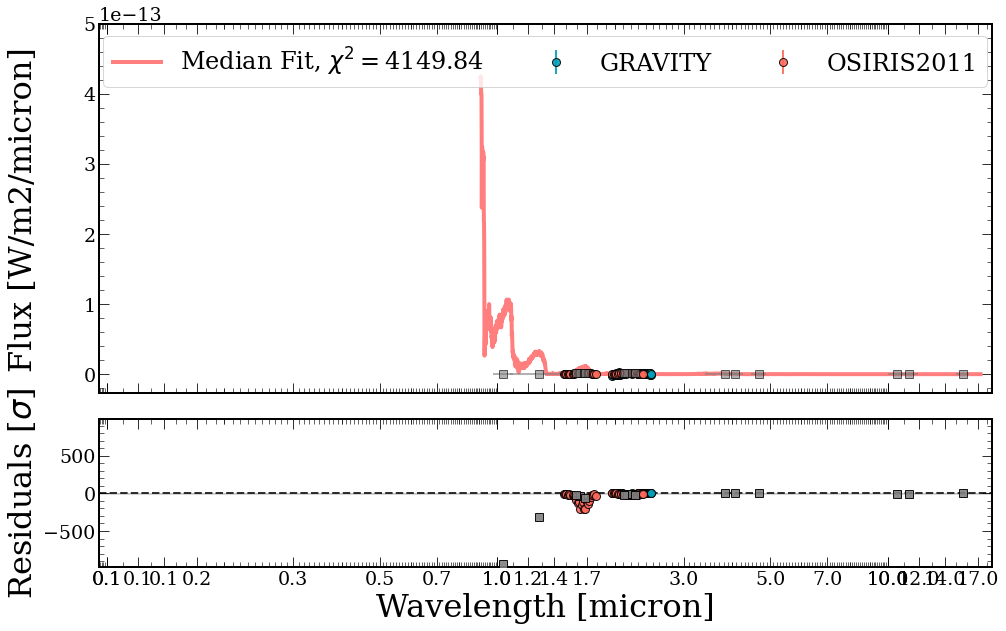

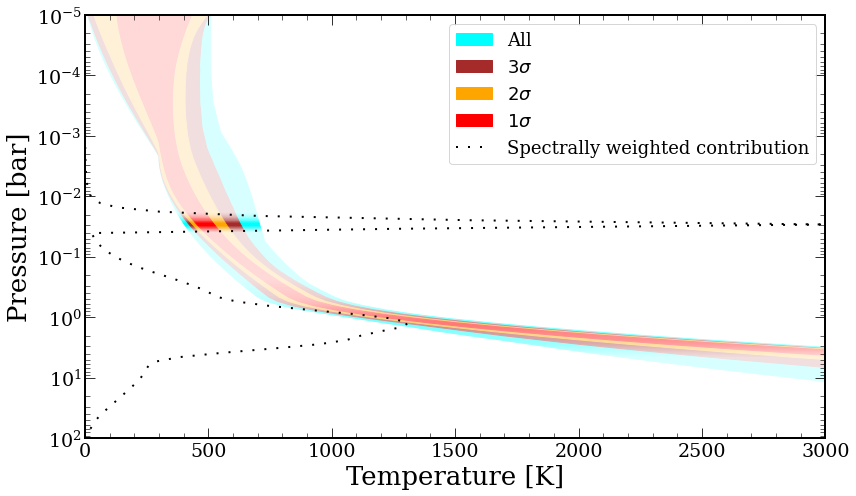

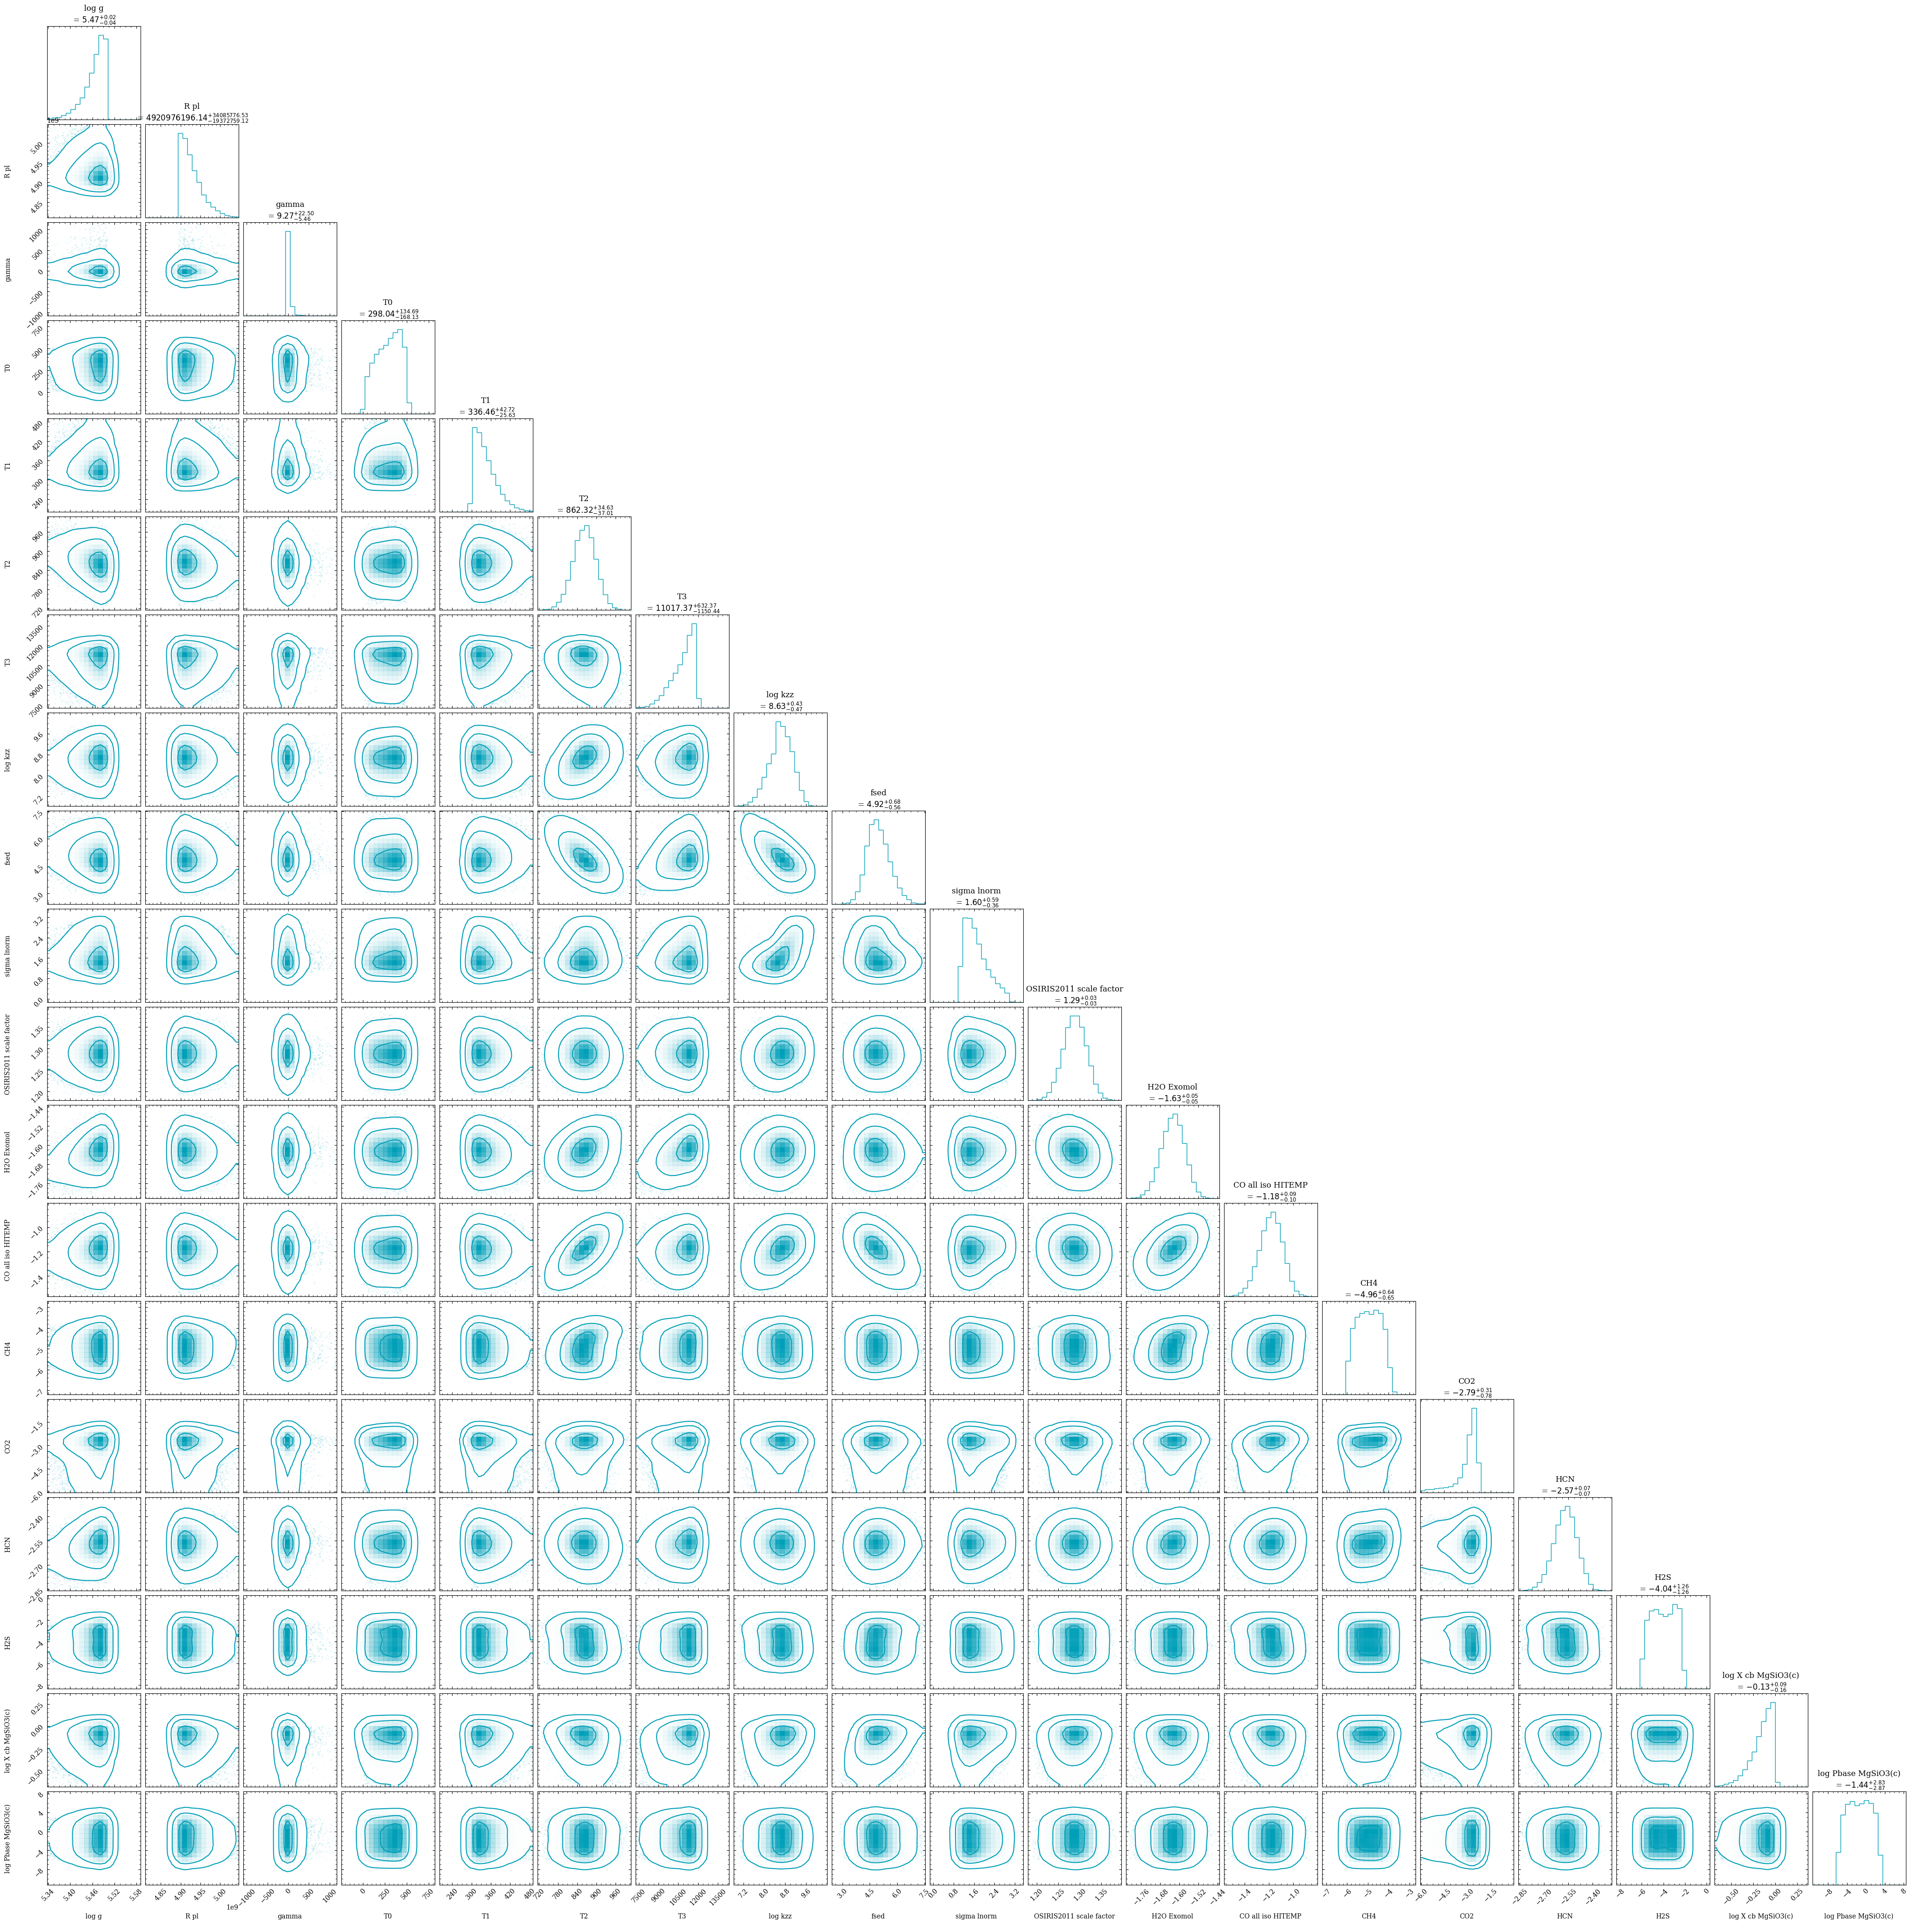

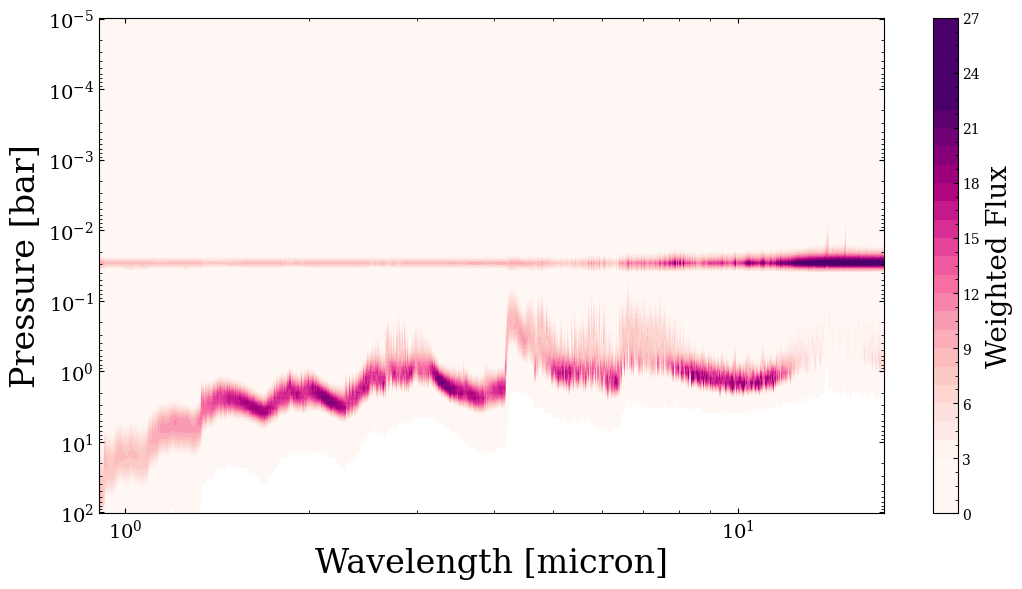

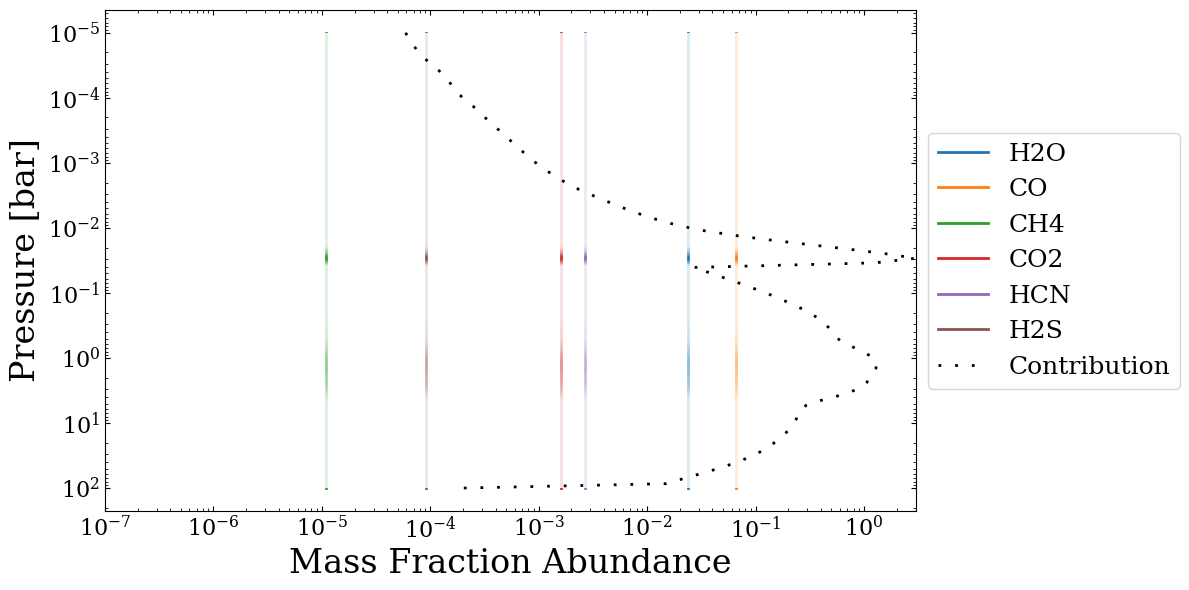

In [3]:
RunDefinition = RetrievalConfig(retrieval_name = retrievals[ret_num], # Give a useful name for your retrieval
                                run_mode = "evaluate", # 'retrieval' to run, or 'evaluate' to make plots
                                pressures = np.logspace(-6,3,80),
                                AMR = True,             # Adaptive mesh refinement, slower if True
                                scattering = True)      # Add scattering for emission spectra clouds

RunDefinition.add_data('GRAVITY',
                    obs_dir+'observations/HR8799b_GRAVITY.fits',
                    distance = 41.2925*nc.pc,
                    model_generating_function = interpolated_profile_emission)
# Normalize to 10pc
RunDefinition.data['GRAVITY'].scale_to_distance(10.0*nc.pc)

RunDefinition.add_data('OSIRIS2011',
                    obs_dir+'observations/hr8799b_osiris_hk_2011.txt',
                    model_generating_function = interpolated_profile_emission,
                    scale = True,
                    data_resolution = 300,
                    model_resolution = 300,
                    external_pRT_reference=None)

RunDefinition.data['OSIRIS2011'].flux = 3e-12*RunDefinition.data['OSIRIS2011'].flux*1e-3/(RunDefinition.data['OSIRIS2011'].wlen)**2
RunDefinition.data['OSIRIS2011'].flux_error = 3e-12*RunDefinition.data['OSIRIS2011'].flux_error*1e-3/(RunDefinition.data['OSIRIS2011'].wlen)**2
RunDefinition.data['OSIRIS2011'].covariance = None

#################################################
# Set up photometric dataset
#################################################
RunDefinition.add_photometry(obs_dir+'observations/hr8799b_photometry.txt',
                            model_generating_function = interpolated_profile_emission,
                            model_resolution = 40 )


#################################################
# Add parameters, and priors for free parameters.
#################################################
RunDefinition.add_parameter(name = 'D_pl', free = False, value = 10.0*nc.pc)

# This run uses the model of Molliere (2020) for HR8799e
# Radius slightly tweaked for b.
# Choose two of log_g, radius and mass priors
RunDefinition.add_parameter('log_g',True,
                            transform_prior_cube_coordinate = \
                            lambda x : 2.0+3.5*x)

# Guillot params
"""RunDefinition.add_parameter('mass',True,\
                            transform_prior_cube_coordinate = \
                            lambda x : gaussian_prior(x,5.8*nc.m_jup,0.5*nc.m_jup))"""
RunDefinition.add_parameter('R_pl', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : ( 0.7+1.3*x)*nc.r_jup_mean)
# Guillot
"""RunDefinition.add_parameter('T_int', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : 300.+2200.*x)
RunDefinition.add_parameter('T_equ', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : 10 + 90.*x)
RunDefinition.add_parameter('gamma', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : 10**(-((x-(-0.0))/2.)**2./2.))
RunDefinition.add_parameter('log_kappa_IR', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : -4.0 + 4.0*x)"""

RunDefinition.add_parameter('log_prior_weight', False, value = 0)
RunDefinition.add_parameter('nnodes', False, value =  2)
RunDefinition.add_parameter('gamma', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : inverse_gamma_prior(x,1,5e-5))
for i in range(2+2):
    RunDefinition.add_parameter(f'T{i}', True, \
                                transform_prior_cube_coordinate = \
                                lambda x : 10.+9990.*x)
"""RunDefinition.add_parameter(f'T0', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : 10.+500.*x)
RunDefinition.add_parameter(f'T1', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : 300.+11600.*x)"""
"""RunDefinition.add_parameter('T1', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : 10.+9990.*x)
RunDefinition.add_parameter('T2', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : 10.+9990.*x)
RunDefinition.add_parameter('T3', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : 10.+9990.*x)
RunDefinition.add_parameter('T4', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : 10.+9990.*x)"""

RunDefinition.add_parameter('log_kzz',True,\
                            transform_prior_cube_coordinate = \
                            lambda x : 5.0+8.*x)
RunDefinition.add_parameter('fsed',True,\
                            transform_prior_cube_coordinate = \
                            lambda x : 0.0 + 10.0*x)
RunDefinition.add_parameter('sigma_lnorm', True,
                            transform_prior_cube_coordinate = \
                            lambda x : 1.05 + 1.95*x)
RunDefinition.add_parameter('OSIRIS2011_scale_factor',True,\
                            transform_prior_cube_coordinate = \
                            lambda x : 0.3 + 1.4*x)


#######################################################
# Define species to be included as absorbers
#######################################################
RunDefinition.set_rayleigh_species(['H2', 'He'])
RunDefinition.set_continuum_opacities(['H2-H2', 'H2-He'])
#RunDefinition.set_line_species(['CH4', 'H2O_Exomol', 'CO2', 'HCN', 'CO_all_iso_HITEMP', \
#                                'FeH', 'H2S', 'NH3', 'PH3', 'Na', 'K', 'TiO_all_Exomol', 'VO','SiO'],eq=True)
RunDefinition.set_line_species(['H2O_Exomol','CO_all_iso_HITEMP', 'CH4','CO2', 'HCN', 'H2S'], eq=False)

# Origin run
#RunDefinition.add_cloud_species("Fe(c)_cd", eq = False, abund_lim = (-4.5,4.5), PBase_lim=(-6,3))
RunDefinition.add_cloud_species("MgSiO3(c)_cd", eq = False, abund_lim = (-6.5,0), PBase_lim=(-6,3))



##################################################################
# Define what to put into corner plot if run_mode == 'evaluate'
##################################################################
for key, value in RunDefinition.parameters.items():
    value.plot_in_corner = True
    value.corner_label = key.replace('_',' ')

##################################################################
# Define axis properties of spectral plot if run_mode == 'evaluate'
##################################################################
RunDefinition.plot_kwargs["spec_xlabel"] = 'Wavelength [micron]'
RunDefinition.plot_kwargs["spec_ylabel"] = "Flux [W/m2/micron]"
RunDefinition.plot_kwargs["y_axis_scaling"] = 1.0
RunDefinition.plot_kwargs["xscale"] = 'log'
RunDefinition.plot_kwargs["yscale"] = 'linear'
RunDefinition.plot_kwargs["resolution"] = 500.
RunDefinition.plot_kwargs["nsample"] = 50.

##################################################################
# Define from which observation object to take P-T
# in evaluation mode (if run_mode == 'evaluate'),
# add PT-envelope plotting options
##################################################################
RunDefinition.plot_kwargs["take_PTs_from"] = 'GRAVITY'
RunDefinition.plot_kwargs["temp_limits"] = [0, 3000]
RunDefinition.plot_kwargs["press_limits"] = [1e2, 1e-5]


##################################################################
# Run the Retrieval
##################################################################

retrieval = Retrieval(RunDefinition,
                        output_dir=data_dir,
                    sample_spec = False,
                    ultranest = False)
retrieval.run(n_live_points = 4000,
        sampling_efficiency=0.8,
        const_efficiency_mode=False,
        resume = True)
retrieval.plot_data()
retrieval.plot_all(contribution=True)

In [27]:
obs_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/"
data_dir="/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/e_free/"
retrievals =['HR8799e_23_v01_free_gravphot_freeMgCloud_guillot_mrsigmaprior',
            'HR8799e_23_v01_free_all_freeFeMgCloud_guillotpatchy_newphot_newconv', 
            'HR8799e_23_v03_free_onlygrav_clear_guillot', 
            'HR8799e_23_v01_free_all_freeFeMgCloud_guillot', 
            'HR8799e_23_v03_free_onlygravphot_freeFeCloud_guillot',
            'HR8799e_23_v01_free_all_freeMgCloud_guillot',
            'HR8799e_23_v01_free_all_freeFeMgCloud_guillotfseds_newphot_newconv', 
            'HR8799e_23_v03_free_onlygravphot_freeMgCloud_guillot_mrprior', 
            'HR8799e_23_v03_free_onlygrav_freeMgCloud_guillot', 
            'HR8799e_23_v01_free_all_clear_guillot',
            'HR8799e_23_v03_free_onlygravphot_clear_guillot', 
            'HR8799e_23_v03_free_onlygravphot_freeMgCloud_guillot', 
            'HR8799e_23_v01_free_all_freeMg2Cloud_guillot_newphot_newconv']

RunDefinition = RetrievalConfig(retrieval_name = retrievals[0], # Give a useful name for your retrieval
                                run_mode = "evaluate", # 'retrieval' to run, or 'evaluate' to make plots
                                pressures = np.logspace(-6,3,100),
                                AMR = True,             # Adaptive mesh refinement, slower if True
                                scattering = True)      # Add scattering for emission spectra clouds
RunDefinition.add_data('GRAVITY',
                       obs_dir+'observations/HR8799e.fits',
                       distance = 41.2925*nc.pc,
                       model_generating_function = emission_model_diseq)
# Normalize to 10pc
#RunDefinition.data['GRAVITY'].scale_to_distance(10.0*nc.pc)
"""

RunDefinition.add_data('GPIH',
                       obs_dir+'observations/HR8799e_GPIH_KLIP_spectrum.fits',
                       data_resolution = 160,
                       model_resolution = 160,
                       external_pRT_reference = 'CHARIS',
                       scale = False,
                       model_generating_function = emission_model_diseq)
RunDefinition.add_data('SPHEREYJH',
                       obs_dir+'observations/HR8799e_SPHEREYJH_KLIP_spectrum.fits',
                       data_resolution = 90,
                       model_resolution = 160,
                       scale = False,
                       model_generating_function = emission_model_diseq)
RunDefinition.add_data('CHARIS',
                       obs_dir+'observations/HR8799e_CHARIS_average.dat',
                       data_resolution = 37,
                       model_resolution = 160,
                       scale = False,
                       model_generating_function = emission_model_diseq)
RunDefinition.add_data('ALES',
                       obs_dir+'observations/ALES_HR8799e_spectrum.fits',
                       data_resolution = 40,
                       model_resolution = 80,
                       distance = 41.2925*nc.pc,
                       scale = False,
                       model_generating_function = emission_model_diseq)

RunDefinition.data['ALES'].scale_to_distance(10.0*nc.pc)"""

#################################################
# Set up photometric dataset
#################################################
"""RunDefinition.add_photometry(obs_dir+'observations/hr8799e_photometry.txt',
                             model_generating_function = emission_model_diseq,
                             model_resolution = 40 )
"""

#################################################
# Add parameters, and priors for free parameters.
#################################################
RunDefinition.add_parameter(name = 'D_pl', free = False, value = 10.0*nc.pc)

# This run uses the model of Molliere (2020) for HR8799e
# Check out models.py for a description of the parameters.

# Choose two of log_g, radius and mass priors

RunDefinition.add_parameter('log_g',True,
                            transform_prior_cube_coordinate = \
                            lambda x : 2.0+3.5*x)
RunDefinition.add_parameter('R_pl', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : ( 0.7+1.3*x)*nc.r_jup_mean)

"""RunDefinition.add_parameter('mass',True,\
                            transform_prior_cube_coordinate = \
                            lambda x : gaussian_prior(x, 7.6*nc.m_jup, 0.9*nc.m_jup))
RunDefinition.add_parameter('R_pl', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : gaussian_prior(x, 1.1*nc.r_jup_mean, 0.1*nc.r_jup_mean))"""
RunDefinition.add_parameter('T_int', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : 300.+1700.*x)
RunDefinition.add_parameter('T3', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : x)
RunDefinition.add_parameter('T2', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : x)
RunDefinition.add_parameter('T1', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : x)
RunDefinition.add_parameter('alpha', True, \
                            transform_prior_cube_coordinate = \
                            lambda x :1.0+x)
RunDefinition.add_parameter('log_delta', True, \
                            transform_prior_cube_coordinate = \
                            lambda x : x)

RunDefinition.add_parameter('log_pquench',True,\
                            transform_prior_cube_coordinate = \
                            lambda x : -6.0+9.0*x)
RunDefinition.add_parameter('Fe/H',True,\
                            transform_prior_cube_coordinate = \
                            lambda x : -1.5+3.0*x)
RunDefinition.add_parameter('C/O',True,\
                            transform_prior_cube_coordinate = \
                            lambda x : 0.1+1.5*x)

RunDefinition.add_parameter('sigma_lnorm', True,
                            transform_prior_cube_coordinate = \
                            lambda x : 1.05 + 1.95*x)
RunDefinition.add_parameter('log_kzz',True,\
                            transform_prior_cube_coordinate = \
                            lambda x : 5.0+8.*x)
RunDefinition.add_parameter('fsed',True,\
                            transform_prior_cube_coordinate = \
                            lambda x : 0.0 + 10.0*x)
"""RunDefinition.add_parameter('fsed_MgSiO3(c)',True,\
                            transform_prior_cube_coordinate = \
                            lambda x : 0.0 + 10.0*x)"""
"""RunDefinition.add_parameter("ALES_scale_factor", True,\
			    transform_prior_cube_coordinate = \
			    lambda x : 0.85 + 0.3*x)
RunDefinition.add_parameter("GPI_scale_factor", True,\
			    transform_prior_cube_coordinate = \
			    lambda x : 0.7 + 0.6*x)
RunDefinition.add_parameter("SPHERE_scale_factor", True,\
			    transform_prior_cube_coordinate = \
			    lambda x : 0.7 + 0.6*x)"""
#######################################################
# Define species to be included as absorbers
#######################################################
RunDefinition.set_rayleigh_species(['H2', 'He'])
RunDefinition.set_continuum_opacities(['H2-H2', 'H2-He'])

# TODO: Add FeH, VO, TiO, CrH
# TODO: Compare standard w ExoMol
RunDefinition.set_line_species(['H2O_Exomol'])#, 'CO_all_iso_HITEMP', 'CH4', 'CO2', 'NH3', 'HCN',\
#                                'H2S', 'FeH', 'PH3', 'Na_allard', 'K_allard', 'TiO_all_Exomol', 'VO','SiO'],
#                               eq=True)
# Origin run
#RunDefinition.add_cloud_species("Fe(c)_cd",eq = True,abund_lim = (-3.5,4.5))
#RunDefinition.add_cloud_species("MgSiO3(c)_cd",eq = True,abund_lim = (-3.5,4.5))
RunDefinition.add_cloud_species("Fe(c)_cd",eq = True,scaling_factor = (-2.5,4.5))
RunDefinition.add_cloud_species("MgSiO3(c)_cd",eq = True,scaling_factor= (-2.5,4.5))


##################################################################
# Define what to put into corner plot if run_mode == 'evaluate'
##################################################################
for key, value in RunDefinition.parameters.items():
    value.plot_in_corner = True
    value.corner_label = key.replace('_',' ')

##################################################################
# Define axis properties of spectral plot if run_mode == 'evaluate'
##################################################################
RunDefinition.plot_kwargs["spec_xlabel"] = 'Wavelength [micron]'

RunDefinition.plot_kwargs["spec_ylabel"] = "Flux [W/m2/micron]"
RunDefinition.plot_kwargs["y_axis_scaling"] = 1.0
RunDefinition.plot_kwargs["xscale"] = 'linear'
RunDefinition.plot_kwargs["yscale"] = 'linear'
RunDefinition.plot_kwargs["resolution"] = 80.
RunDefinition.plot_kwargs["nsample"] = 10.

##################################################################
# Define from which observation object to take P-T
# in evaluation mode (if run_mode == 'evaluate'),
# add PT-envelope plotting options
##################################################################
RunDefinition.plot_kwargs["take_PTs_from"] = 'GRAVITY'
RunDefinition.plot_kwargs["temp_limits"] = [150, 3000]
RunDefinition.plot_kwargs["press_limits"] = [1e2, 1e-5]


##################################################################
# Run the Retrieval
##################################################################
retrieval = Retrieval(RunDefinition,
                      sample_spec = False,
                      output_dir=data_dir,
		              ultranest = False)
#retrieval.plot_data()
#retrieval.run(n_live_points = 4000,
#	      sampling_efficiency=0.8,
#          const_efficiency_mode=False,
#	      resume = True)
#retrieval.plot_all(contribution=True)

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Starting retrieval HR8799e_23_v01_diseq_all_eqFeMgCloudSetting up PRT Objects
Emission scattering is enabled: enforcing test_ck_shuffle_comp = True
  Read line opacities of H2O_Exomol...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.

Setting up AMR pressure grid.
Best fit likelihood = 13090.30
Best fit 𝛘^2 = -8548.94
Best fit 𝛘^2/DoF = -36.69


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


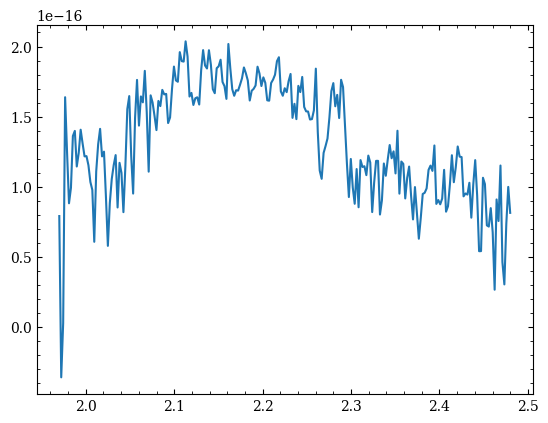